# Imports

In [1]:
import math
import random 
import datetime
import itertools
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt 
from functools import reduce
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression, make_blobs

# Config

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>" "#notebook { padding-top:0px !important; } .container { width:90% !important; } .end_space { min-height:0px !important; } </style>"))

  <h1 style="color:darkblue; font-size:300%"> Basics </h1>

# Lineare Algebra

In [3]:
def matrix_transpose(A):
    return [ [A[j][i] for j in range(len(A))]  
            for i in range(len(A[0]))]


def matrix_subtraktion(A, B):
    return [ [A[i][j] - B[i][j] for j in range(len(A[0]))]    
            for i in range(len(A))] 

def matrix_multiplication(A,B):
    result = []
    for k in range(len(A)):
        k_result = []
        for i in range(len(B[0])):
            sum_i = 0
            for j in range(len(A[0])):
                sum_i += (A[k][j] * B[j][i])
            k_result += [sum_i]
        result += [k_result]
    return result


def dot_product(v, w):
    return sum([v[i] * w[i] for i in range(len(v))])

def l1_norm(v):
    return sum([abs(v[i]) for i in range(len(v))])

def l2_norm(v):
    return math.sqrt(sum([v[i]**2 for i in range(len(v))]))


# Statistik

In [4]:
def expected_value(X):
    return sum(X) / len(X)

def sum_of_square_deviations(X):
    return sum((x_i - expected_value(X))**2 for x_i in X)

def variance(X):
    return (sum_of_square_deviations(X) / (len(X)-1))

def standard_deviation(X):
    return variance(X)**0.5

def gaussian_probability_density(x, u, std):
    return ((1 / ( std * math.sqrt(2 * math.pi))) * 
            math.exp( -(1/2) * ( (x - u) / std) )**2 )

def prior_probability(x_i, X):
    return X.count(x_i) / len(X)

def joint_probability(x_i, y_i, X, Y):
    return [x_i == X[i] and y_i == Y[i] 
            for i in range(len(X))].count(True) / len(X)

def conditional_probability(x_i, y_i, X, Y):
    Z = [z for z in list(zip(X, Y)) if z[1] == y_i]
    return [x_i == z[0] for z in Z].count(True) / len(Z)

def marginal_probability(x_i, X, Y):
    return sum([conditional_probability(x_i, y_i, X, Y)
                * prior_probability(y_i, Y) for y_i in Y])

def covariance(X, Y):
    return sum([(X[i] - expected_value(X)) * (Y[i] - expected_value(Y)) 
                for i in range(len(X))]) * (1 / (len(X) -1))

def covariance_matrix(A):
    return [[covariance(i, j) for j in matrix_transpose(A)] 
            for i in matrix_transpose(A)]

# Outliers

In [5]:
X = [1, 2, -3, 4, 1, 4, 9, 20, 100]

def get_outliers_by_standard_deviation(X, threshold=3):
       return [x for x in X 
               if abs(x) > standard_deviation(X) * threshold]

get_outliers_by_standard_deviation(X)

[100]

In [6]:
standard_deviation(X)

32.42684073418192

# t-test

In [7]:
# https://matheguru.com/stochastik/t-test.html 
# Zweistichproben-t-Test für unabhängige Stichproben (ungepaarter t-Test)
# Zusätzlich zu der Annahme dass die Daten normalverteilt sind, wird auch davon ausgegangen, dass die Standardabweichung geich 
# Shapiro-Wilk-Test, oder verschiedenen plots verwenden um dass sicher zu stellen


def t_test(X, Y):
    standard_error = s_p(X, Y) * sqrt( 1/len(X) + 1/len(Y) )
    return  expected_value(X) - expected_value(Y) / standard_error
    
def s_p(X, Y):
    std = lambda x: standard_deviation(x)
    degree_of_freedom = len(X) + len(Y) - 2
    return sqrt( ((len(X)-1)*std(X)**2 + (len(Y)-1)*std(Y)**2) 
                / degree_of_freedom)
    
    
X = [1, 2, 3, 4]
Y = [5, 6, 7, 8 , 9]

s_p(X, Y), expected_value(X), expected_value(Y), standard_deviation(X), standard_deviation(Y)

t_test(X, Y), s_p(X,Y) #(-4.628451081042417, 1.4638501094227998)

(-4.628451081042417, 1.4638501094227998)

# z-test 

In [8]:
# https://welt-der-bwl.de/Gau%C3%9F-Test

mean = lambda x: sum(x)/len(x)

def z_test(sample, population):
    return ((mean(sample), expected_value(population)) /
            std(population) / sqrt(len(sample)))


$ z=\frac{\left(\bar{x}-\mu_{0}\right)}{\sigma_{\bar{x}}} $

# Analysis of Variance (ANOVA)

In [9]:
#  ANOVAs erfordern Daten aus annähernd normalverteilten Grundgesamtheiten mit gleichen Varianzen bei den Faktorstufen
# https://towardsdatascience.com/1-way-anova-from-scratch-dissecting-the-anova-table-with-a-worked-example-170f4f2e58ad


In [10]:
import scipy.stats

def ANOVA(groups):
    merged = sum(groups, [])
    overall_mean = expected_value(merged)
    group_means = sum([[expected_value(g)]*len(g) 
                       for g in groups], [])
    sum_of_squares = sum_of_square_deviations(merged)
    ss_residual = sum([sum_of_square_deviations(g) 
                       for g in groups])
    ss_explained = sum((overall_mean - mean)**2 
                       for mean in group_means)    
    ms_residual = ss_residual / (len(merged) - len(groups))
    ms_explained = ss_explained / (len(groups) - 1)
    f_statistic = ms_explained / ms_residual
    return  f_statistic


A = [12.6 , 12, 11.8, 11.9, 13, 12.5, 14]
B = [10, 10.2, 10, 12, 14, 13]
C = [10.1, 13, 13.4, 12.9, 8.9, 10.7, 13.6, 12]


groups = [A,B,C]
n_obj = len(sum(groups, []))
n_groups = len(groups)
df_residual = n_obj - n_groups
df_explained = n_groups -1 

p_value = 1 - scipy.stats.f.cdf(ANOVA(groups), df_explained, df_residual)
p_value, ANOVA(groups)

(0.4556832940515221, 0.8212966923081592)



# Chi-Quadrat-Test

# Misc

In [11]:
def mean_square_error(Y, Y_prediction):
    return (1 / len(Y)) * sum([(Y[i] - Y_prediction[i])**2 
                               for i in range(len(Y))])

def euclidean_distance(v, w):
    return sqrt(sum([(v[i] - w[i])**2 
                     for i in range(len(v))]))

def euclidean_norm(v):
    return sqrt(sum([x**2 for x in v]))

def scale(X):
    return [(X[i] - expected_value(X)) / standard_deviation(X) 
            for i in range(len(X))]

def cosine_similarity(v, w):
    return dot_product(v, w) / (l2_norm(v) * l2_norm(w))

  <h1 style="color:darkblue; font-size:300%"> Regression </h1>

In [12]:
def gradient_descent(X, Y, learning_rate=0.3, m=0, b=0, iterations=5):
    for i in range(iterations):
        b_gradient = - (2 / len(X)) * sum([ Y[i] - ( m * X[i] + b) 
                                           for i in range(len(X))])
        m_gradient = - (2 / len(X)) * sum([ X[i] * (Y[i] - ( m * X[i] + b)) 
                                           for i in range(len(X))])
        b = b - (learning_rate * b_gradient)
        m = m - (learning_rate * m_gradient)
    return b, m

In [13]:
# Sample Data
data_regression = make_regression(n_samples=300, n_features=1, n_targets=1, noise=30, bias=10)
data = pd.DataFrame.from_records(data_regression[0], columns =['x'])
data['y'] = data_regression[1]
X = data.x.values
Y = data.y.values

In [14]:
b, m = gradient_descent(X, Y)
print(b, m)

7.440805081213086 56.68655032009352


In [15]:
Y_prediction = [m * X[i] + b for i in range(len(X))]
mean_square_error(Y, Y_prediction)

987.1969662787837

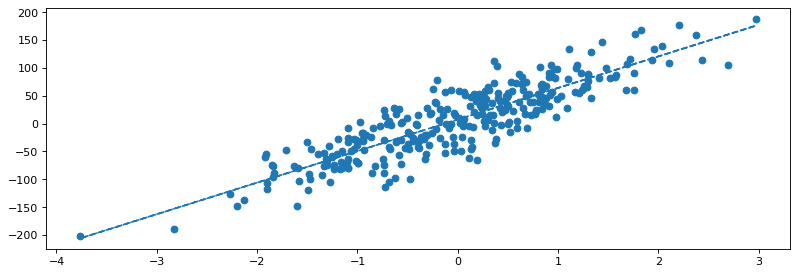

In [16]:
f = plt.figure(figsize=(12, 4), dpi=80)
plt.scatter(X,Y,figure=f)
plt.plot(X, Y_prediction, "--", figure=f)
plt.show()

<h1 style="color:darkblue; font-size:300%"> Klassifikation </h1>

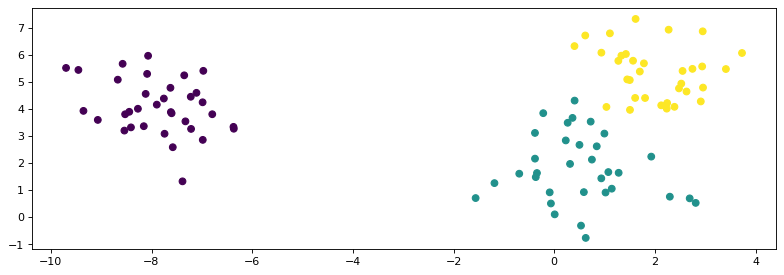

In [41]:
p = conditional_probability 
m = marginal_probability
g = gaussian_probability_density

product = lambda L: L[0] * mul(L[1:]) if len(L) > 0 else 1
   
    
def posterior_probability(c, v, X, Y):
    prior = prior_probability(c, Y)
    likelihood = product( [p(v[i], c, [w[i] for w in X], Y) 
                           for i in range(len(v))])
    marginal = product( [m(v[i], [w[i] for w in X], list(Y)) 
                         for i in range(len(v))])
    return (prior * likelihood) / marginal


def gaussian_probability_density(x, u, std):    
    return ((1 / ( std * math.sqrt(2 * math.pi))) * 
            math.exp(-((x - u)**2 / (2 * std**2 ))))


def gaussian_naive_bayes_classifier(v, X, Y):
    results = []
    for class_i in set(Y):
        probability = prior_probability(class_i, Y)  
        X_class_i = [X[j] for j in range(len(Y)) if Y[j] == class_i]
        for i in range(len(v)):
            w = [w[i] for w in X_class_i]
            probability *= g(v[i], expected_value(w), 
                             standard_deviation(w))
        results += [(class_i, probability)]
    return [x[1] for x in results].index(max([x[1] for x in results]))


X, Y = make_blobs(n_samples=100, random_state=173)
plt.figure(figsize=(12, 4), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=[gaussian_naive_bayes_classifier(v, list(X), list(Y)) for v in X])

<h1 style="color:darkblue; font-size:300%"> Clustern </h1>

In [18]:
def k_means_Lloyd(X, k):
    # Initialisierung: Wähle k zufällige Mittelwerte
    centroids = [list(X[random.randint(0, len(X)-1)]) for i in range(k)]
    last_centroids = None
    while (last_centroids != centroids):

        last_centroids = centroids.copy()

        # Datenobjekt zugeordnen, wobei Cluster-Varianz minimiert wird
        assignments = [min([(sum((X[x_i] - centroids[k_i])**2), k_i) 
                             for k_i in range(k)])[1] 
                       for x_i in range(len(X))]

        # Mittelpunkte der Cluster neu berechnen
        for k_i in range(k): 
            k_i_subset = [X[i] for i in range(len(X)) 
                          if assignments[i] == k_i]
            centroids[k_i] = list(1 / len(k_i_subset) * sum(k_i_subset))
            
    return assignments

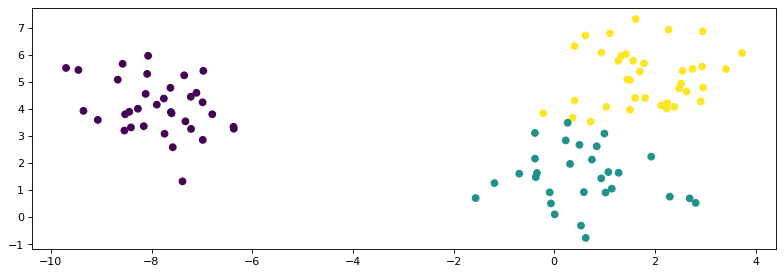

In [19]:
plt.figure(figsize=(12, 4), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=k_means_Lloyd(X, k=3))

<h1 style="color:darkblue; font-size:300%"> Dimensionsreduktion </h1>

In [20]:
from numpy import mean
from numpy.linalg import eig

eigenvalues_and_eigenvectors = eig
T = matrix_transpose


def principal_component_analysis(A):
    column_means = [mean(column) for column in T(A)]

    # center columns by subtracting column mean
    centers = [ [row[i] - column_means[i] 
                 for i in range(len(A[0]))] for row in A]

    # calculate covariance matrix of centered matrix
    cov = covariance_matrix(centers)

    # calculate eigendecomposition of covariance matrix
    values, vectors = eigenvalues_and_eigenvectors(cov)
    
    # project data into subspace via matrix multiplication
    return T(matrix_multiplication(T(vectors), T(centers)))

In [21]:
A = [[1, 2], 
     [3, 4], 
     [5, 6]]

principal_component_analysis(A)

[[-2.82842712474619, 0.0], [0.0, 0.0], [2.82842712474619, 0.0]]

<h1 style="color:darkblue; font-size:300%"> Anomalieerkennung </h1>

In [22]:
def k_nearest_neighbors(X, y, v, k, regression=False, d=euclidean_distance):
    neighbors = [(d(X[i], v), y[i]) for i in range(len(X))]
    neighbors.sort(key=lambda w: w[1]) # call by reference
    knn =  neighbors[:k]
    labels = [x[1] for x in knn]
    if regression : 
        return sum(labels) / len(labels)
    else: # classification 
        return max(labels, key=labels.count)


In [23]:
def knn(v, X, k):
    neighbors = [ (X[i], euclidean_distance(X[i], v)) for i in range(len(X))]
    neighbors.sort(key=lambda w: w[1]) # call by reference
    knn =  neighbors[1:k+1]
    return [x[0] for x in knn]

def outlier_detection_knn(X, k=10):
    knn_table = [ knn(X[j], X, k) for j in range(len(X)) ]
    knn_distance = [ [X[i]  - x  for x in knn_table[i]][k-1] 
                for i in range(len(X)) ]
    return  list(map(euclidean_norm, knn_distance))

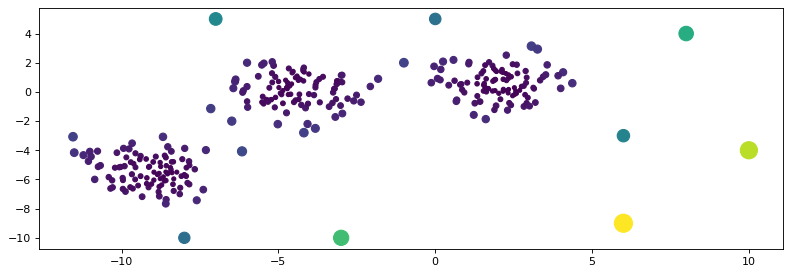

In [24]:
# Sample Data
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=170)
noise = [ [random.randint(-10, 10), random.randint(-10, 10)] for _ in range(10)]
X = np.append(X, noise, axis=0)
data = pd.DataFrame(dict(x=X[:,0], y=X[:,1]))

knn_distance = outlier_detection_knn(X)
plt.figure(figsize=(12, 4), dpi=80)
plt.scatter(data.x, data.y, c=knn_distance,  s=[x*30 for x in knn_distance])

<h1 style="color:darkblue; font-size:300%"> Assoziationsanalyse </h1>

In [25]:
from functools import reduce

C = ['A', 'B', 'C', 'D', 'E']

X = [ [1, 1, 1, 0, 1], 
      [0, 0, 1, 1, 0], 
      [1, 1, 0, 0, 1],
      [1, 0, 1, 0, 0],
      [1, 1, 1, 1, 1]]

    
transactions = [ frozenset([C[j] for j in range(len(C)) if X[i][j] == 1 ]) 
                for i in range(len(X))]

def merge_subsets(M):
    result = []
    for i in range(len(M)):
        for j in range(i+1,len(M)):
            result += [M[i] | M[j]]
    return set(result)

def support_filter(c_i, transactions, threshold=0.5):
    return [frozenset(c) for c in c_i if support(c, transactions) >= threshold ]


def get_disjoint_subsets(M):
    return [ (x, M - x) for x in  [set(x) for x in list(itertools.combinations(M, len(M)-1))]]


def support(c, A):    
    return [set(c).issubset(a_i) for a_i in A].count(True) / len(X)

def confidence(L, R, M):
    return (support(L | R, M)) / support(L, M)


def apriori_algorithm(transactions, min_support, min_confidence):
    
    # step 1: select all candidates 
    c_i = [ frozenset(x) for x in 
           reduce(lambda i, j: i | j, transactions )]
    candidates = []
    while c_i:
        c_i = merge_subsets(c_i)
        c_i = support_filter(c_i, transactions, threshold=min_support)
        candidates += c_i
        
    # step 2: 
    for candidat in candidates:
        for L, R in get_disjoint_subsets(candidat):
            conv = round(confidence(L, R, transactions),3)
            if conv >= min_confidence:
                print(L , '=>', set(R), 'with ', conv, ' confidence')

apriori_algorithm(transactions, min_support=0.6, min_confidence=0.8)

{'B'} => {'A'} with  1.0  confidence
{'E'} => {'B'} with  1.0  confidence
{'B'} => {'E'} with  1.0  confidence
{'E'} => {'A'} with  1.0  confidence
{'E', 'B'} => {'A'} with  1.0  confidence
{'E', 'A'} => {'B'} with  1.0  confidence
{'B', 'A'} => {'E'} with  1.0  confidence


<h1 style="color:darkblue; font-size:300%"> Empfehlungen </h1>

In [26]:
member_vector = lambda word, sentence : 1 if (word in sentence) else 0

def term_frequency(term, sentence):
    return sentence.count(term) / len(sentence)

def inverse_data_frequency(term, data):
    m = sum([sentence.count(term) for sentence in data])
    if m == 0:
        return 0
    return math.log(len(data) / m)

def TF_IDF(term, sentence, data, corpus):
    tf = term_frequency(term, sentence)
    idf = inverse_data_frequency(term, data)
    return tf*idf

def preprocess(sentence):
    word_vector = [w.upper() for w in sentence.split(' ')]
    for i in range(len(word_vector)):
        word_vector[i] = "".join([char for char in word_vector[i]
                                  if char.isalpha()])
    return word_vector

def corpus_vector(s, corpus):
    return [member_vector(v, s) for v in corpus]

def vector_TF_IDF(w, data, corpus, v_bin):
    v = []
    for i in range(len(v_bin)):
        if v_bin[i] == 1:
            v += [TF_IDF(corpus[i], w, data, corpus)]
        else:
            v += [0.0]
    return v

In [27]:
corpus = ['THE', 'CAR', 'TRUCK', 'IS', 'DRIVEN', 'ON', 'THE', 'ROAD', 'HIGHWAY']

In [28]:
s1 = "The car is driven on the road."
s2 = "The truck is driven on the highway."
s3 = 'The Truck is on the highway.'
s4 = 'The Truck on highway.'

data = [ preprocess(s) for s in [s1, s2, s3, s4]]
data

[['THE', 'CAR', 'IS', 'DRIVEN', 'ON', 'THE', 'ROAD'],
 ['THE', 'TRUCK', 'IS', 'DRIVEN', 'ON', 'THE', 'HIGHWAY'],
 ['THE', 'TRUCK', 'IS', 'ON', 'THE', 'HIGHWAY'],
 ['THE', 'TRUCK', 'ON', 'HIGHWAY']]

In [29]:
data_bin = [ corpus_vector(s, corpus) for s in data]
data_bin

[[1, 1, 0, 1, 1, 1, 1, 1, 0],
 [1, 0, 1, 1, 1, 1, 1, 0, 1],
 [1, 0, 1, 1, 0, 1, 1, 0, 1],
 [1, 0, 1, 0, 0, 1, 1, 0, 1]]

In [30]:
data_v = [ vector_TF_IDF(data[i], data, corpus, data_bin[i]) for i in range(len(data))]


In [31]:
cosine_similarity(data_v[1], data_v[2])

0.9227357479578236

<h1 style="color:darkblue; font-size:300%"> Neuronales Netz </h1>

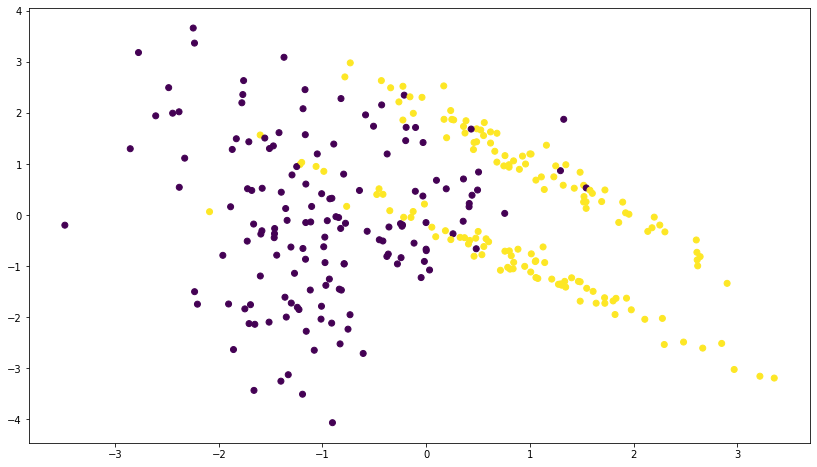

In [32]:
data_classification = make_classification(n_samples=300,n_features=4, n_classes=2)
data = pd.DataFrame.from_records(data_classification[0], columns=['x1', 'x2', 'x3', 'x4'])
data['y'] = data_classification[1]
plt.figure(figsize=(14, 8))
plt.scatter(data.x3, data.x4, c=data.y)
plt.show()

In [33]:
from math import e

def sigmoid(x):
    return 1/(1 + e**(-x))


def sigmoid_derivative(x):
    return x * (1 - x)

def random_matrix(i, j):
    return np.random.rand(i,j) 


def matrix_transpose(A):
    return np.array(A).T

sigmoid = lambda x:  1/(1 + e**(-x))
sigmoid_derivative = lambda x: x * (1 - x)

T = lambda M : matrix_transpose(M)
o = lambda A,B : matrix_multiplication(A,B)
f = lambda M: [list(map(sigmoid_derivative, x)) for x in M]


class Neural_Network:
    def __init__(self, x, y):
        self.input = x
        self.weights1= random_matrix(self.input.shape[1],4) 
        self.weights2 = random_matrix(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = [list(map(sigmoid, x)) for x in 
                       (o(self.input, self.weights1))]
        self.layer2 = [list(map(sigmoid, x)) for x in 
                       (o(self.layer1, self.weights2))]
        return self.layer2
        
    def backprop(self):
        w = [ 2 * (self.y[i] - self.output[i]) * 
             sigmoid_derivative(self.output[i][0]) 
             for i in range(len(self.y))]
        self.weights2 += o(T(self.layer1), w) 
        self.weights1 += o(T(self.input), o(w, f(T(self.weights2)))) 
                                          
    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        
X = data[['x1', 'x2', 'x3', 'x4']].values
y = np.array([ [i] for i in data['y']], dtype=float)

NN = Neural_Network(X,y)
for i in range(9):
    print ("iteration " + str(i) +  " - Loss: " + str(np.mean(np.square(y - NN.feedforward()))))   
    NN.train(X, y)

iteration 0 - Loss: 0.33357473482095373
iteration 1 - Loss: 0.19083333333333333
iteration 2 - Loss: 0.19
iteration 3 - Loss: 0.18916666666666668
iteration 4 - Loss: 0.18916666666666668
iteration 5 - Loss: 0.18916666666666668
iteration 6 - Loss: 0.1891665048677108
iteration 7 - Loss: 0.18833333333333332
iteration 8 - Loss: 0.18833333333333332


/home/sandro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars


<h1 style="color:darkblue; font-size:300%"> Genetische Algorithmen </h1>

# Knapsack Beispiel

In [34]:
from itertools import product


def ks_exhaustive(s_list, v_list, S, k):
    m = len(s_list)                                 
    selection_list = list(product((1,0), repeat=m))     
    for selection in selection_list:
        if v_kS(selection, s_list, v_list, S, k, m):
            return 1
    return 0


def v_kS(selection, s_list, v_list, S, k, m):
    tmp_S = 0
    tmp_k = 0
    for i in range(m):
        if selection[i] == 1:
            tmp_k += v_list[i]
            tmp_S += s_list[i]
    if tmp_S <= S and tmp_k >= k:
        return True
    return False

ks_exhaustive([5, 5, 4, 5, 5],[9, 9, 1, 9, 9],4,1)

1

In [35]:
class Genetic_Algorithm():
    
    def __init__(self, w, v, W):
        self.w = w; self.v = v
        self.W = W; self.m = len(v)
        self.generation = []  # store genes
        self.mutate   = 0.1  # mutation chance
        self.survival = 0.5 # survival chance
        self.n_childs = 64 # population size
        self.n_generations = 1000 # number of generations
        self.best_score = (None, -1)
        
    def populate(self):
        for j in range(self.n_childs):
            self.generation += [ [random.randint(0, 1) 
                                for i in range(self.m)]]
    def fitness(self, genes):
        genes_W, genes_score = 0, 0
        for i in range(self.m):
            if genes[i] == 1:
                genes_W += self.w[i]
                genes_score += self.v[i]
            if genes_W > self.W:
                return -1
        return genes_score
    
    def mutation(self, genes):
        for i in range(self.m):
            if random.uniform(0, 1) <= self.mutate:
                genes[i] = 1 - genes[i]
        return genes
    
    def crossover(self, genes_1, genes_2):
        j = random.randint(1, (self.m-1))
        if random.randint(0,1) == 0: 
            return genes_1[:j] + genes_2[j:]
        return genes_2[:j] + genes_1[j:]
    
    def selection(self):
        evaluation = []
        for genes in self.generation:
            evaluation += [(genes, self.fitness(genes))]
        evaluation.sort(key=lambda w: w[1], reverse=True) 
        if evaluation[0][1] > self.best_score[1]:
            self.best_score = evaluation[0]
        evaluation = [g[0] for g in evaluation]
        self.generation =  evaluation[:round(self.n_childs*self.survival)]
    
    def evolution(self):
        self.populate()  # init generation 
        
        for l in range(self.n_generations):
            self.selection() # surviving of the fittest
            n_parents = len(self.generation)
            for _ in range(self.n_childs - n_parents):
                parent_1 = self.generation[random.randint(0, n_parents -1)]
                parent_2 = self.generation[random.randint(0, n_parents -1)]
                self.generation += [ self.crossover(parent_1, parent_2) ]

            self.generation = [self.mutation(gene) for gene in self.generation]
        return self.generation
          
    
    
ks = Genetic_Algorithm([15, 19, 11, 17, 4, 11, 17, 2, 13, 20], 
                       [10, 7, 8, 14, 15, 17, 6, 2, 3, 2], 
                       48)
ks.evolution()
ks.best_score

([0, 0, 1, 1, 0, 1, 1, 1, 0, 0], 56)

<h1 style="color:darkblue; font-size:300%"> Reinforcement learning </h1>

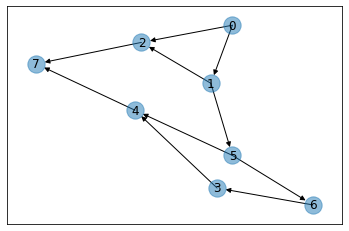

<Figure size 1440x640 with 0 Axes>

In [36]:
import networkx as nx

def plot_wolrd(actions):
    points =[]
    for i in range(len(actions)):
        for j in actions[i]:
            points += [(i, j)]
    G = nx.DiGraph()
    G.add_edges_from(points)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos, alpha=0.5, arrows=True)
    nx.draw_networkx_edges(G,pos, stlye='dashdot')
    nx.draw_networkx_labels(G,pos)
    plt.figure(figsize=(18, 8), dpi=80)
    plt.show()

#actions = generate_word(5)
actions = [[1, 2], [2, 5], [7], [4], [7], [6, 4], [3], [] ]
plot_wolrd(actions)

In [37]:
rewards = [-1, -1, -100, 10, -1, -1, 10, -1, 100]
goal = 7
start = 0
danger = 2
n_states = 8

n_episodes = 100        
max_steps = 10
epsilon = 1.0   
learning_rate = 0.65

# Q-Learning

In [38]:
def update_Q_matrix(Q, state, action, value):
    Q[state] =  Q[state][:action] + [value] + Q[state][action+1:]
    return Q

In [39]:
Q = [[0]*n_states]*n_states


for episode in range(n_episodes):
    state = start
    # score = rewards[start]
    for step in range(max_steps):
        possible = actions[state]
        if epsilon < random.uniform(0, 1):
            best = -1000
            action = -1
            for p in possible:
                if Q[state][p] > best:
                    action = p
                    best = Q[state][action]
        else:
            action = random.sample(possible,1)[0]
            
        Q = update_Q_matrix(Q, state, state, rewards[action])
                
        future_reward = Q[action].index(max(Q[action]))
        
        value = (1 - learning_rate) * Q[state][action] 
        value += learning_rate * (rewards[action] + future_reward) 
        
        Q = update_Q_matrix(Q, state, action, value)
        
        state = action
        if state == goal or state == danger:
            break 
            
Q

[[-1, 4.0, -100.0, 0, 0, 0, 0, 0],
 [0, -100, -99.99999999673739, 0, 0, 4.999999999745051, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, -1, -0.9999724145264648, 0, 0, 0],
 [0, 0, 0, 0, -1, 0, 0, -0.9999999999986011],
 [0, 0, 0, 0, -0.9999999492905722, -1, 15.999251251432618, 0],
 [0, 0, 0, 9.999724145264649, 0, 0, 10, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [40]:

current_state = 0
steps = [current_state]

while current_state != goal:
    possible = actions[current_state]
    best = -1000
    action = -1
    for p in possible:
        if Q[state][p] > best:
            action = p
            best = Q[current_state][action]                  
    next_step_index = action 
    
    steps.append(next_step_index)
    current_state = next_step_index
    

# Print selected sequence of steps
print("Selected path:")
print(steps)

Selected path:
[0, 1, 5, 6, 3, 4, 7]
